## Table of Contents
1. [Introduction](#Introduction)  
2. [Data Loading](#Data-Loading)  
3. [Data Cleaning](#Data-Cleaning)  
4. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))  
   - [Time-Based Sales Trends](#Time-Based-Sales-Trends)  
     - [Monthly, Quarterly, and Yearly Summaries](#Monthly,-Quarterly,-and-Yearly-Summaries)  
   - [Product Performance](#Product-Performance)  
     - [Top Categories & Subcategories](#Top-Categories-&-Subcategories)  
     - [Sales Trends by Category Over the Years](#Sales-Trends-by-Category-Over-the-Years)  
   - [Customer Insights](#Customer-Insights)  
     - [Customer Segment Distribution](#Customer-Segment-Distribution)  
     - [Revenue Distribution Across Customer Segments](#Revenue-Distribution-Across-Customer-Segments)  
     - [Customer Order Frequency Analysis](#Customer-Order-Frequency-Analysis)  
     - [Top Buyers by Sales](#Top-Buyers-by-Sales)  
   - [Logistics & Operations](#Logistics-&-Operations)  
     - [Shipping Mode Distribution](#Shipping-Mode-Distribution)  
   - [Geographical Analysis](#Geographical-Analysis)  
       - [Regional Sales Trends Over the Years](#Regional-Sales-Trends-Over-the-Years)  
       - [Top States by Sales](#Top-States-by-Sales)  
       - [Top Cities by Sales](#Top-Cities-by-Sales)  
       - [Top 10 Cities by Sales and Category](#Top-10-Cities-by-Sales-and-Category)  
       - [Top 10 Cities by Sales and Customer Segment](#Top-10-Cities-by-Sales-and-Customer-Segment)  
       - [Sales Distribution Across States](#Sales-Distribution-Across-States)  
6. [Conclusion](#Conclusion)  
   - [Key Findings](#Key-Findings)  
   - [Recommendations](#Recommendations)

---

## Introduction
- **Purpose**: The purpose of this project is to analyze sales performance across different dimensions such as cities, regions, product categories, and time periods. By leveraging data visualization techniques, the project aims to uncover key insights that can support data-driven decision-making in sales strategy.

- **Dataset Overview**: The dataset contains transactional sales data, including order dates, product categories, customer segments, geographic locations (states, cities, and regions), and total sales amounts. The data spans multiple years, allowing for trend analysis and comparisons across various dimensions.

---

## Data Loading
Load and examine the initial structure of the datasets required for this analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
df = pd.read_csv('/content/sample_data/superstore.csv')
print(df.shape)
df.head()

(9800, 18)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


---
## Data Cleaning
Data cleaning is essential to prepare the datasets for analysis. This section focuses on ensuring consistency, handling missing values, and standardizing formats across the data.

### Standardize and Inspect
Standardize column names for easier access and inspect data structure.

In [5]:
# standarize columns names
def standarize_column_name(col):
    return col.lower().replace(" ","_").replace("-","_")

df.columns = [standarize_column_name(col) for col in df.columns]

# Drop the Row ID column
df.drop('row_id',axis = 1, inplace = True)

In [6]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9800 non-null   object 
 1   order_date     9800 non-null   object 
 2   ship_date      9800 non-null   object 
 3   ship_mode      9800 non-null   object 
 4   customer_id    9800 non-null   object 
 5   customer_name  9800 non-null   object 
 6   segment        9800 non-null   object 
 7   country        9800 non-null   object 
 8   city           9800 non-null   object 
 9   state          9800 non-null   object 
 10  postal_code    9789 non-null   float64
 11  region         9800 non-null   object 
 12  product_id     9800 non-null   object 
 13  category       9800 non-null   object 
 14  sub_category   9800 non-null   object 
 15  product_name   9800 non-null   object 
 16  sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


Data type of `order_date`and `ship_date` is inappropriate. It should be datetime.

In [8]:
# Change the data type of order_date and ship date to be datetime
date_columns = ['order_date', 'ship_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors = 'coerce', format='%d/%m/%Y')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9800 non-null   object        
 1   order_date     9800 non-null   datetime64[ns]
 2   ship_date      9800 non-null   datetime64[ns]
 3   ship_mode      9800 non-null   object        
 4   customer_id    9800 non-null   object        
 5   customer_name  9800 non-null   object        
 6   segment        9800 non-null   object        
 7   country        9800 non-null   object        
 8   city           9800 non-null   object        
 9   state          9800 non-null   object        
 10  postal_code    9789 non-null   float64       
 11  region         9800 non-null   object        
 12  product_id     9800 non-null   object        
 13  category       9800 non-null   object        
 14  sub_category   9800 non-null   object        
 15  product_name   9800 n

### Handle Missing Values
Identify and address missing data to improve data qualities.

In [10]:
df.isna().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_id,0
customer_name,0
segment,0
country,0
city,0
state,0


To handle the null values in the postal code column, I will not drop them. Instead, I will fill them with the corresponding postal codes based on their respective cities.
First, I need to identify the cities where the postal code is missing. Then, I will replace the missing values with the correct postal code for each city.

In [11]:
df[df['postal_code'].isnull()]

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
2234,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


I have identified that the postal code is missing only for Burlington city in Vermont state. Therefore, I need to fill in the correct postal code for this city.

In [12]:
# Postal code for Burlington city
df['postal_code'] = df['postal_code'].fillna(5401)
df.isnull().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_id,0
customer_name,0
segment,0
country,0
city,0
state,0


In [13]:
# check duplicate
print("Number of duplicate data: ", df.duplicated().sum())

Number of duplicate data:  1


In [14]:
df[df.duplicated(keep=False)]

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
3405,US-2015-150119,2015-04-23,2015-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372
3406,US-2015-150119,2015-04-23,2015-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [15]:
# Delete the duplicate data
df.drop_duplicates(inplace=True)

In [16]:
# check duplicate
print("Number of duplicate data: ", df.duplicated().sum())

Number of duplicate data:  0


---
## Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) provides an initial understanding of the data

In [17]:
df.describe()

,order_date,ship_date,postal_code,sales
count,9799,9799,9799.000000,9799.000000
mean,2017-05-01 07:02:29.525461760,2017-05-05 06:06:30.162261504,55218.566690,230.763895
min,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000
25%,2016-05-24 12:00:00,2016-05-28 00:00:00,23223.000000,17.248000
50%,2017-06-26 00:00:00,2017-06-29 00:00:00,57701.000000,54.480000
75%,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.572000
max,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000
std,NaN,NaN,32068.158155,626.683644


### Time-Based Sales Trends
Understanding sales trends over time is crucial for identifying seasonal patterns, measuring business growth, and developing effective marketing strategies.
#### Monthly, Quarterly, and Yearly Summaries
##### Monthly Metrics
Analyze key monthly metrics, including total sales, average order value (AOV), and order growth rates. Understanding these monthly trends provides insights into seasonality, promotional impact, and business health over time.

In [18]:
# Aggregate monthly metrics grouped by purchase month
monthly_summary = df.groupby(df['order_date'].dt.to_period('M').rename('order_month')).agg(
    total_sales=('sales', 'sum'),
    avg_sales=('sales', 'mean'),
    total_orders=('order_id', 'count')
)

# Calculate the growth rate for each metric
monthly_summary['sales_growth_rate'] = monthly_summary['total_sales'].pct_change() * 100
monthly_summary['aov_growth_rate'] = monthly_summary['avg_sales'].pct_change() * 100
monthly_summary['order_growth_rate'] = monthly_summary['total_orders'].pct_change() * 100

# Fill NaN values with 0, round, and convert to integers
monthly_summary = monthly_summary.fillna(0).round(0).astype(int)

# Apply background gradient to the growth columns with a custom colormap
styled_summary = monthly_summary.style.format("{:,}")  # Apply comma formatting
styled_summary = styled_summary.background_gradient(
    subset=['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate'],
    cmap="RdYlGn",  # Red to Yellow to Green colormap
    vmin=-100,      # Set minimum for orange on the left end
    vmax=100        # Set maximum for green on the right end
)

# Display the styled DataFrame
styled_summary

,total_sales,avg_sales,total_orders,sales_growth_rate,aov_growth_rate,order_growth_rate
order_month,,,,,,
2015-01,"14,206",184,77,0,0,0
2015-02,"4,520",98,46,-68,-47,-40
2015-03,"55,206",358,154,"1,121",265,235
2015-04,"27,625",214,129,-50,-40,-16
2015-05,"23,644",195,121,-14,-9,-6
2015-06,"34,323",262,131,45,34,8
2015-07,"33,782",238,142,-2,-9,8
2015-08,"27,118",186,146,-20,-22,3
2015-09,"81,624",306,267,201,65,83


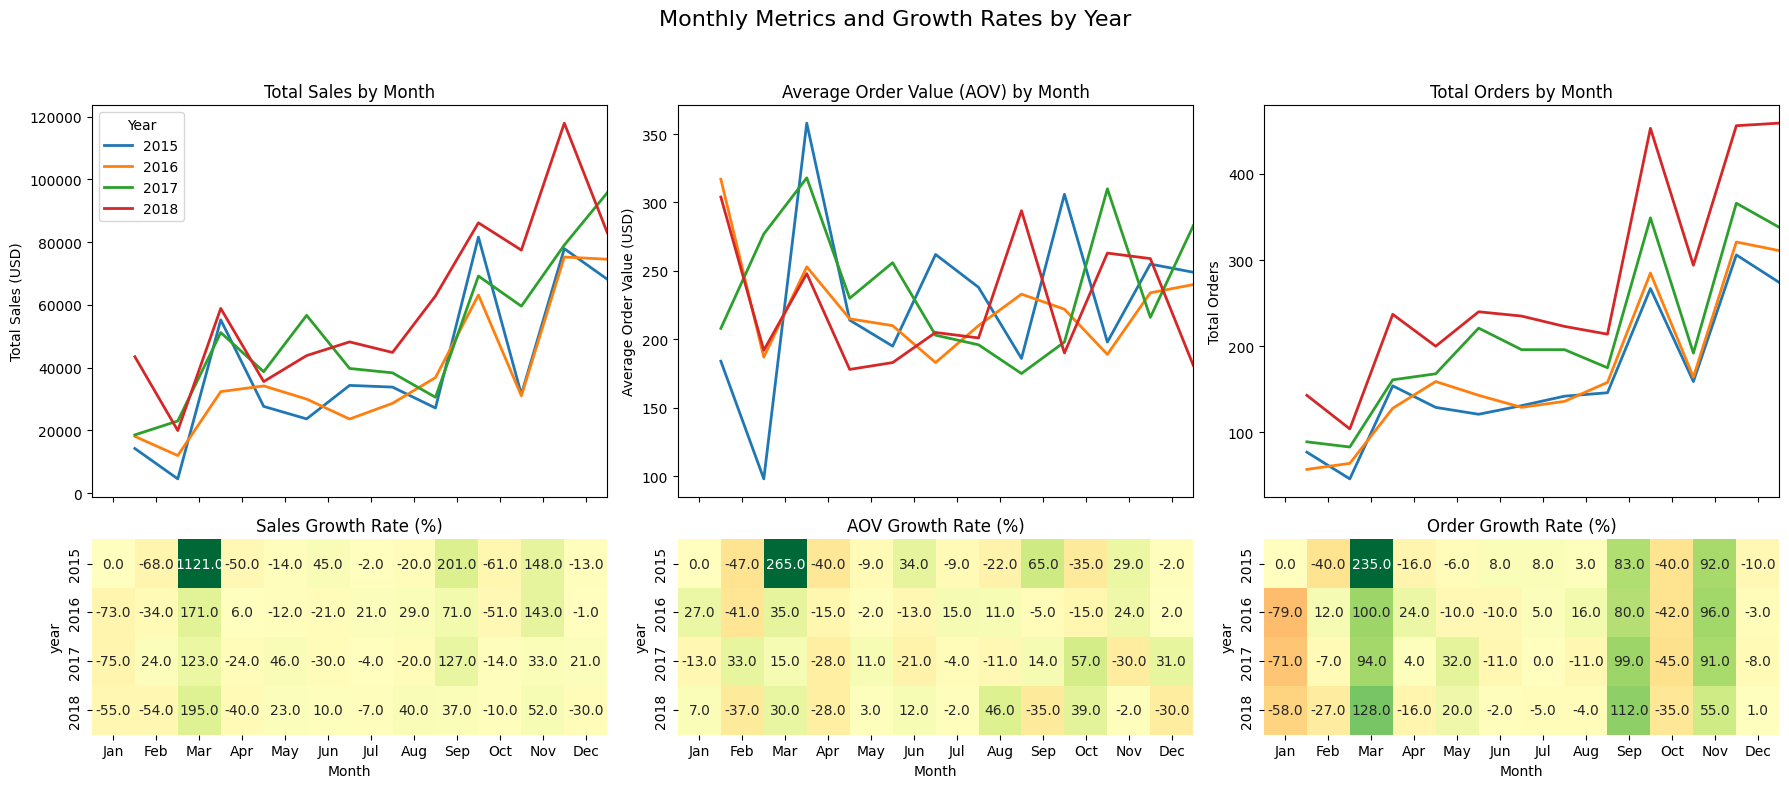

In [19]:
# Extract year and month from the date index if not already done
monthly_summary['year'] = monthly_summary.index.year
monthly_summary['month'] = monthly_summary.index.month

# Set up the figure with a 2x3 grid: 3 line charts and 3 heatmaps
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharex='col', gridspec_kw={'height_ratios': [2, 1]})

# Define colors for each year
years = monthly_summary['year'].unique()
colors = plt.cm.tab10(np.arange(len(years)))  # Use tab10 colormap for consistent color assignment; current style is too dark

# Metrics to plot
metrics = ['total_sales', 'avg_sales', 'total_orders']
titles = ['Total Sales by Month', 'Average Order Value (AOV) by Month', 'Total Orders by Month']
y_labels = ['Total Sales (USD)', 'Average Order Value (USD)', 'Total Orders']
growth_metrics = ['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate']
growth_titles = ['Sales Growth Rate (%)', 'AOV Growth Rate (%)', 'Order Growth Rate (%)']

# Plot line charts for each metric
for i, (metric, title, y_label) in enumerate(zip(metrics, titles, y_labels)):
    for j, year in enumerate(years):
        yearly_data = monthly_summary[monthly_summary['year'] == year]
        axes[0, i].plot(yearly_data['month'], yearly_data[metric], label=f'{year}', color=colors[j], linewidth=2)
    axes[0, i].set_title(title)
    axes[0, i].set_ylabel(y_label)
    axes[0, i].set_xticks(range(1, 13))
    axes[0, i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    if i == 0:
        axes[0, i].legend(title='Year', loc='upper left')

# Prepare and plot heatmaps for growth rates
for i, (growth_metric, growth_title) in enumerate(zip(growth_metrics, growth_titles)):
    growth_data = monthly_summary.pivot_table(index='year', columns='month', values=growth_metric)
    sns.heatmap(growth_data, cmap='RdYlGn', ax=axes[1, i], cbar=False, annot=True, fmt=".1f", center=0)
    axes[1, i].set_title(growth_title)
    axes[1, i].set_xticks(np.arange(0.5, 12))
    axes[1, i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[1, i].set_xlabel('Month')

# Final layout adjustments
plt.suptitle('Monthly Metrics and Growth Rates by Year', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Monthly Summary Insight:

**1. Unstable Sales Growth**  
   - There are significant fluctuations in sales from month to month. For example, after a massive spike in March 2015 (+1121%), there was a sharp decline in the following month (-50%).  
   - The same pattern is seen in 2017 and 2018, where high spikes in some months (e.g., September 2017 +127%) are followed by significant drops (January 2018 -55%).  

**2. Clear Seasonal Patterns**  
   - September and November consistently show a significant increase in sales and orders (e.g., November 2016 +143%, November 2017 +33%, November 2018 +52%).  
   - Meanwhile, January and February usually experience sharp declines (e.g., January 2016 -73%, January 2017 -75%, January 2018 -55%).  

**3. Order Growth Does Not Always Align with AOV Growth**  
   - Even when the number of orders increases, the Average Order Value (AOV) does not always grow. For instance, in September 2016, orders grew by 80%, but AOV declined by 5%.  
   - In other months, AOV increased despite a drop in orders, such as in October 2017 (+57% AOV but -45% in orders).  

**4. 2018 Shows a More Consistent Growth Trend**  
   - Compared to previous years, 2018 shows a more stable increase, with several months recording positive growth (e.g., March +195%, August +40%, November +52%).  
   - However, December 2018 saw a sharp decline (-30%), indicating external factors affecting sales at the year-end.

---

##### Quarterly Summary

In [20]:
# Quarterly summary
quarterly_summary = df.groupby(df['order_date'].dt.to_period('Q').rename('order_date')).agg(
    total_sales=('sales', 'sum'),
    avg_sales=('sales', 'mean'),
    total_orders=('order_id', 'count')
)

# Calculate quarterly growth rates for each metric
quarterly_summary['sales_growth_rate'] = quarterly_summary['total_sales'].pct_change() * 100
quarterly_summary['aov_growth_rate'] = quarterly_summary['avg_sales'].pct_change() * 100
quarterly_summary['order_growth_rate'] = quarterly_summary['total_orders'].pct_change() * 100

# Fill NaN values with 0, round, and convert to integers
quarterly_summary = quarterly_summary.fillna(0).round(0).astype(int)

# Apply background gradient and comma formatting
styled_quarterly_summary = quarterly_summary.style.format("{:,}").background_gradient(
    subset=['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate'],
    cmap="RdYlGn",
    vmin=-100,
    vmax=100
)

# Display the styled quarterly summary
styled_quarterly_summary

,total_sales,avg_sales,total_orders,sales_growth_rate,aov_growth_rate,order_growth_rate
order_date,,,,,,
2015Q1,"73,931",267,277,0,0,0
2015Q2,"85,593",225,381,16,-16,38
2015Q3,"142,523",257,555,67,14,46
2015Q4,"177,528",240,739,25,-6,33
2016Q1,"62,358",250,249,-65,4,-66
2016Q2,"87,713",204,431,41,-19,73
2016Q3,"128,560",222,579,47,9,34
2016Q4,"180,805",227,796,41,2,37
2017Q1,"92,686",278,333,-49,23,-58


Quarterly Summary Insight:

**1. Q1 consistently experiences a sharp decline in total sales and orders.**  
   - 2016Q1 saw a significant drop (-65% sales, -66% orders) compared to 2015Q4.  
   - 2017Q1 also fell sharply (-49% sales, -58% orders) compared to 2016Q4.  
   - 2018Q1 experienced another decline (-48% sales, -46% orders) compared to 2017Q4.  
   - **Insight:** Early-year performance tends to be weaker, possibly due to seasonal effects or business strategy shifts.  

**2. Q4 is consistently the best-performing quarter each year.**  
   - 2015Q4 recorded the highest sales in 2015.  
   - 2016Q4 saw a strong recovery with +41% sales growth compared to the previous quarter.  
   - 2017Q4 had the highest growth in the year, with +70% sales.  
   - 2018Q4 set another record with +44% sales and +36% orders.  
   - **Insight:** Q4 might be driven by major shopping events, year-end promotions, or seasonal spending habits.  

**3. AOV fluctuates with a declining trend in some quarters.**  
   - AOV dropped sharply in 2016Q2 (-19%) and 2017Q3 (-17%), even though total sales increased.  
   - 2017Q4 saw a sharp AOV increase (+36%), contributing to the highest total sales of the year.  
   - 2018 experienced a slight AOV drop in early Q1 (-3%) and small growth in Q4 (+6%).  
   - **Insight:** Changes in pricing strategy or customer purchasing behavior significantly impact AOV.  

**4. Order growth outpaces sales growth, indicating higher transaction volume but smaller order values.**  
   - 2016Q2: Orders increased 73%, but sales only grew 41%, suggesting more transactions with lower values.  
   - 2017Q2: Orders grew 76%, but sales increased only 46%, showing a similar pattern.  
   - 2018Q2: Orders increased 39%, but sales barely grew 4%, reinforcing this trend.  
   - **Insight:** More customers may be making purchases, but with lower order values, possibly due to discount strategies or shifting spending habits.  

### Key takeaways:  
- Q1 is consistently weak, suggesting a need for specific strategies to boost early-year sales.  
- Q4 is always the peak sales period.  
- AOV is fluctuating, with declines in several quarters despite sales and order growth.  
- Orders are growing faster than sales.  

---

##### Yearly Summary

In [21]:
# Yearly summary
yearly_summary = df.groupby(df['order_date'].dt.to_period('Y').rename('order_date')).agg(
    total_sales=('sales', 'sum'),
    avg_sales=('sales', 'mean'),
    total_orders=('order_id', 'count')
)

# Calculate yearly growth rates for each metric
yearly_summary['sales_growth_rate'] = yearly_summary['total_sales'].pct_change() * 100
yearly_summary['aov_growth_rate'] = yearly_summary['avg_sales'].pct_change() * 100
yearly_summary['order_growth_rate'] = yearly_summary['total_orders'].pct_change() * 100

# Fill NaN values with 0, round, and convert to integers
yearly_summary = yearly_summary.fillna(0).round(0).astype(int)

# Apply background gradient and comma formatting
styled_yearly_summary = yearly_summary.style.format("{:,}").background_gradient(
    subset=['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate'],
    cmap="RdYlGn",
    vmin=-100,
    vmax=100
)

# Display the styled yearly summary
styled_yearly_summary

,total_sales,avg_sales,total_orders,sales_growth_rate,aov_growth_rate,order_growth_rate
order_date,,,,,,
2015,"479,575",246,"1,952",0,0,0
2016,"459,436",224,"2,055",-4,-9,5
2017,"600,193",237,"2,534",31,6,23
2018,"722,052",222,"3,258",20,-6,29


Yearly Summary Insights:  

1. The decline in sales in 2016 indicates business challenges. Total sales dropped by 4% compared to 2015, with the average order value (AOV) decreasing by 9%, despite a slight increase in the number of orders by 5%. This suggests that while more transactions occurred, the average value per transaction was lower.  

2. The year 2017 showed a strong recovery with a 31% increase in sales, driven by a 6% rise in AOV and a 23% growth in total orders.

3. The year 2018 recorded solid sales growth of 20%, but AOV declined by 6%, meaning the number of orders surged by 29% but with a lower average order value.  

4. Overall, the trend shows that the number of orders has consistently increased each year, although AOV has fluctuated. This could indicate that the business strategy is more focused on increasing transaction volume rather than maintaining or raising the average value per transaction.


---

### Product Performance
Assess the performance of sub category products, focusing on key metrics such as total revenue, average order value (AOV), order count, and . This analysis identifies top-performing products and highlights areas for potential product improvement.

In [22]:
df['product_name'].nunique()

1849

In [23]:
product_performance = df.groupby('category').agg(
    total_revenue=('sales', 'sum'),
    total_revenue_pct=('sales', lambda x: x.sum() / df['sales'].sum() * 100),
    aov=('sales', 'mean'),
    order_count=('order_id', 'count'),
    order_count_pct=('order_id', lambda x: x.count() / df['order_id'].count() * 100)
)

product_performance = product_performance.sort_values(by='total_revenue', ascending=False)

product_performance = product_performance.round(2)

styled_product_performance = product_performance.style.format("{:,.2f}").background_gradient(
    subset=['aov', 'total_revenue_pct', 'order_count_pct'],
    cmap="RdYlGn",
    vmin=0
)

styled_product_performance

,total_revenue,total_revenue_pct,aov,order_count,order_count_pct
category,,,,,
Technology,"827,455.87",36.59,456.40,"1,813.00",18.50
Furniture,"728,377.20",32.21,350.69,"2,077.00",21.20
Office Supplies,"705,422.33",31.20,119.38,"5,909.00",60.30


Product Category Performance Insights

1. **Office Supplies Contribute the Most Orders (60.3%) but Have the Lowest AOV**  
   Office Supplies account for the highest number of orders (5,909 orders, 60.3% of total orders), but the average order value (AOV = ``$119.38``) is significantly lower than other categories. This indicates that customers frequently purchase items in this category, but in small transactions or with lower-priced items.  

2. **Technology: Highest Revenue with the Largest AOV (``$456.40``)**  
   Technology generates the highest revenue (``$827,455.87`` or 36.59% of total revenue) despite making up only 18.5% of total orders. This is due to the highest AOV (``$456.40``), meaning each transaction in this category has a significantly higher value compared to others.  

3. **Furniture Has More Orders Than Technology but a Lower AOV**  
   Furniture generates ``$728,377.20`` (32.21% of total revenue) with 2,077 orders (21.2%), surpassing Technology in order count but with a lower AOV (``$350.69``). This suggests that while customers purchase Furniture more frequently than Technology, the value per transaction is lower.  

4. **Balanced Revenue Contribution Between Technology, Furniture, and Office Supplies**  
   Technology (36.59%), Furniture (32.21%), and Office Supplies (31.20%) have a nearly even revenue distribution. However, the significantly higher order volume in Office Supplies indicates that this category relies on transaction volume, while Technology and Furniture depend more on per-transaction value.ction value.

In [24]:
tech_sub_category = df[df['category'] == 'Technology'].groupby('sub_category').agg(
    total_revenue=('sales', 'sum'),
    total_revenue_pct=('sales', lambda x: x.sum() / df[df['category'] == 'Technology']['sales'].sum() * 100),
    aov=('sales', 'mean'),
    order_count=('order_id', 'count'),
    order_count_pct=('order_id', lambda x: x.count() / df[df['category'] == 'Technology']['order_id'].count() * 100)
)

tech_sub_category = tech_sub_category.sort_values(by='total_revenue', ascending=False)

tech_sub_category = tech_sub_category.round(2)

styled_tech_sub_category = tech_sub_category.style.format("{:,.2f}").background_gradient(
    subset=['aov', 'total_revenue_pct', 'order_count_pct'],
    cmap="RdYlGn",
    vmin=0
)

styled_tech_sub_category

,total_revenue,total_revenue_pct,aov,order_count,order_count_pct
sub_category,,,,,
Phones,"327,782.45",39.61,374.18,876.00,48.32
Machines,"189,238.63",22.87,"1,645.55",115.00,6.34
Accessories,"164,186.70",19.84,217.18,756.00,41.70
Copiers,"146,248.09",17.67,"2,215.88",66.00,3.64


Product Sub-Category Technology Insights:

1. **Phones Contribute the Highest Revenue (39.61%) with the Most Orders (48.32%)**  
   - Phones are the top sub-category in revenue (``$327,782.45`` or 39.61%) and also have the highest number of orders (876 orders, 48.32%).  
   - The AOV is ``$374.18``, indicating that this product has a mid-range price compared to other sub-categories.  

2. **Machines Have a Very High AOV (``$1,645.55``) but the Fewest Orders (6.34%)**  
   - Machines contribute only 115 orders (6.34% of total orders) but have the highest AOV (``$1,645.55``).  

3. **Accessories: High Order Volume but Low AOV (``$217.18``)**  
   - Accessories generate ``$164,186.70`` (19.84% of revenue) with 756 orders (41.70%), making it a frequently purchased sub-category but with a lower AOV compared to Phones and Machines.  
   - This suggests that customers often buy accessories in large quantities, but with a smaller per-transaction value.

In [25]:
office_supplies_sub_category = df[df['category'] == 'Office Supplies'].groupby('sub_category').agg(
    total_revenue=('sales', 'sum'),
    total_revenue_pct=('sales', lambda x: x.sum() / df[df['category'] == 'Office Supplies']['sales'].sum() * 100),
    aov=('sales', 'mean'),
    order_count=('order_id', 'count'),
    order_count_pct=('order_id', lambda x: x.count() / df[df['category'] == 'Office Supplies']['order_id'].count() * 100)
)

office_supplies_sub_category = office_supplies_sub_category.sort_values(by='total_revenue', ascending=False)

office_supplies_sub_category = office_supplies_sub_category.round(2)

styled_office_supplies_sub_category = office_supplies_sub_category.style.format("{:,.2f}").background_gradient(
    subset=['aov', 'total_revenue_pct', 'order_count_pct'],
    cmap="RdYlGn",
    vmin=0
)

styled_office_supplies_sub_category

,total_revenue,total_revenue_pct,aov,order_count,order_count_pct
sub_category,,,,,
Storage,"219,343.39",31.09,263.63,832.00,14.08
Binders,"200,028.78",28.36,134.07,"1,492.00",25.25
Appliances,"104,618.40",14.83,227.93,459.00,7.77
Paper,"76,828.30",10.89,57.42,"1,338.00",22.64
Supplies,"46,420.31",6.58,252.28,184.00,3.11
Art,"26,705.41",3.79,34.02,785.00,13.28
Envelopes,"16,128.05",2.29,65.03,248.00,4.20
Labels,"12,347.73",1.75,34.59,357.00,6.04
Fasteners,"3,001.96",0.43,14.03,214.00,3.62


Product Sub-Category Office Supplies Insight:

1. Storage dan Binders menyumbang lebih dari 59% dari total revenue kategori Office Supplies.

2. Paper memiliki 1.338 order (22,64% dari total), namun AOV-nya hanya $57,42, terendah di kategorinya.

3. Appliances memiliki AOV tinggi sebesar $227,93, tetapi hanya menyumbang 7,77% dari total order.

4. Supplies dan Art menyumbang lebih dari $73.000 revenue dengan total 969 order.

5. Fasteners hanya menyumbang 0,43% dari total revenue dengan AOV terendah sebesar $14,03.  

### Top Categories & Subcategories

In [26]:
print(df['sub_category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [27]:
subcategory_count = df.groupby('category')['sub_category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by='sub_category', ascending=False)
subcategory_count.reset_index(drop=True)

,category,sub_category
0,Office Supplies,9
1,Furniture,4
2,Technology,4


In [28]:
subcategory_count_sales = df.groupby(['category','sub_category'])['sales'].sum().reset_index()
subcategory_count_sales = subcategory_count_sales.sort_values(by='sales', ascending=False)
subcategory_count_sales.reset_index(drop=True)

,category,sub_category,sales
0,Technology,Phones,327782.4480
1,Furniture,Chairs,322541.3590
2,Office Supplies,Storage,219343.3920
3,Furniture,Tables,202810.6280
4,Office Supplies,Binders,200028.7850
5,Technology,Machines,189238.6310
6,Technology,Accessories,164186.7000
7,Technology,Copiers,146248.0940
8,Furniture,Bookcases,113813.1987
9,Office Supplies,Appliances,104618.4030


In [29]:
product_category = df.groupby('category')['sales'].sum().reset_index()
top_product_category = product_category.sort_values(by='sales', ascending=False)
top_product_category.reset_index(drop=True)

,category,sales
0,Technology,827455.8730
1,Furniture,728377.2037
2,Office Supplies,705422.3340


In [30]:
fig = px.pie(
    top_product_category,
    values='sales',
    names='category',
    labels={'category': 'Category ', 'sales': 'Total Sales '},
    color_discrete_sequence=px.colors.sequential.Agsunset
)

fig.update_layout(
    title={
        'text': "<b>Categories Sales Distribution<b>",
        'x': 0.5,
        'xanchor': 'center'},
    title_font=dict(size=20),
    font=dict(family="Poppins", size=12, color="black"),
    legend=dict(x=0.65, y=1),
    height=350,
    width=1000,
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.update_traces(hovertemplate="<b>Categories:</b> %{label}<br><b>Total Sales:</b> $%{value:,.0f}")

fig.show()

From the pie chart above, we can know that technological products have the most sales

In [31]:
fig = px.bar(
    subcategory_count_sales.sort_values(by='sales', ascending=True),
    x='sales',
    y='sub_category',
    orientation='h',
    labels={'sub_category': 'Subcategories', 'sales': 'Total Sales'},
    color_discrete_sequence=px.colors.sequential.Agsunset
)

fig.update_layout(
    title={'text': "<b>Sales by Subcategory</b>", 'x': 0.15, 'xanchor': 'center'},
    title_font=dict(size=20),
    font=dict(family="Poppins", size=12, color="black"),
    height=500,
    plot_bgcolor="rgba(0,0,0,0)"  # Background transparan
)

fig.update_traces(hovertemplate="<b>Subcategories:</b> %{y}<br><b>Total Sales:</b> $%{x:.0f}")

fig.show()


### Sales Trends by Category Over the Years
This section presents the total sales distribution across different product categories from 2015 to 2018, illustrating yearly variations in revenue for each category.

In [32]:
# Konversi order_date menjadi datetime (jika belum)
df['order_date'] = pd.to_datetime(df['order_date'])

# Kelompokkan data berdasarkan kategori dan tahun
category_year_sales = df.groupby([df['order_date'].dt.year, 'category'])['sales'].sum().reset_index()

# Ubah nama kolom agar lebih mudah dipahami
category_year_sales.columns = ['year', 'category', 'total_sales']

# Konversi tahun menjadi string agar tidak dianggap numerik (menghindari stacking)
category_year_sales['year'] = category_year_sales['year'].astype(str)

# Buat bar chart dengan batang per tahun untuk setiap kategori
fig = px.bar(
    category_year_sales,
    x='category',
    y='total_sales',
    color='year',  # Warna berbeda tiap tahun
    labels={'category': 'Category', 'total_sales': 'Total Sales', 'year': 'Year'},
    title="<b>Total Sales by Category (2015-2018)</b>",
    color_discrete_sequence=px.colors.sequential.Agsunset,  # Warna lebih kontras
    barmode='group',  # **Memastikan batang per tahun tidak stack**
    custom_data=['year']
)

fig.update_layout(
    title_font=dict(size=20),
    font=dict(family="Poppins", size=12, color="black"),
    height=500,
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=dict(title="Category"),
    yaxis=dict(title="Total Sales"),
    legend_title="Year"
)

fig.update_traces(
    hovertemplate="<b>Category:</b> %{x}<br>" +
                  "<b>Year:</b> %{customdata[0]}<br>" +
                  "<b>Total Sales:</b> $%{y:,.0f}<extra></extra>"
)

fig.show()

---

## Customer Insight
### Customer Segment Distribution
This section provides an overview of the distribution of customer segments, highlighting the proportion of Consumer, Corporate, and Home Office customers.

In [33]:
types_of_customer = df['segment'].unique()
print(types_of_customer)

['Consumer' 'Corporate' 'Home Office']


In [34]:
number_of_customer = df['segment'].value_counts().reset_index()
number_of_customer = number_of_customer.rename(columns={'segment': 'type_of_customer'})
print(number_of_customer)

  type_of_customer  count
0         Consumer   5101
1        Corporate   2953
2      Home Office   1745


In [35]:
fig = px.pie(df,
             values=np.ones(9799),
             names='segment',
             title='Customer Segment',
             labels={'segment': 'Segment '},
             color_discrete_sequence=px.colors.sequential.Agsunset)

fig.update_layout(
    title={
        'text': "<b>Customer Segment Distribution<b>",
        'x': 0.5,
        'xanchor': 'center'},
    title_font=dict(size=20),
    font=dict(family="Poppins", size=12, color="black"),
    legend=dict(x=0.65, y=1),
    height=350,
    width=1000,
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.update_traces(hovertemplate="<b>Segment:</b> %{label}<br><b>Total Customer:</b> %{value}")

fig.show()

### Revenue Distribution Across Customer Segments
This section presents the distribution of total sales across different customer segments, illustrating their contribution to overall revenue.

In [36]:
sales_per_segment = df.groupby('segment')['sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'segment': 'type_of_customer', 'sales': 'total_sales'})
print(sales_per_segment)

  type_of_customer   total_sales
0         Consumer  1.148061e+06
1        Corporate  6.884941e+05
2      Home Office  4.247008e+05


In [37]:
fig = px.pie(df,
             values='sales',
             names='segment',
             labels={'segment': 'Segment '},
             color_discrete_sequence=px.colors.sequential.Agsunset)

fig.update_layout(
    title={
        'text': "<b>Revenue Distribution Across Customer Segments<b>",
        'x': 0.5,
        'xanchor': 'center'},
    title_font=dict(size=20),
    font=dict(family="Poppins", size=12, color="black"),
    legend=dict(x=0.65, y=1),
    height=350,
    width=1000,
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.update_traces(hovertemplate="Segment: %{label}<br>Total Sales: $%{value:,.0f}")

fig.show()

### Customer Order Frequency Analysis
This analysis identifies repeat customers by evaluating their total number of orders, helping to understand customer loyalty and purchasing behavior.

In [38]:
customer_order_frequency = df.groupby(['customer_id','customer_name','segment'])['order_id'].count().reset_index()
customer_order_frequency.rename(columns={'order_id':'total_orders'}, inplace = True)
repeat_customer = customer_order_frequency[customer_order_frequency['total_orders'] >= 1]
repeat_customer_sorted = repeat_customer.sort_values(by='total_orders', ascending = False)
repeat_customer_sorted.head(10).reset_index(drop=True)

,customer_id,customer_name,segment,total_orders
0,WB-21850,William Brown,Consumer,35
1,MA-17560,Matt Abelman,Home Office,34
2,PP-18955,Paul Prost,Home Office,34
3,JL-15835,John Lee,Consumer,33
4,CK-12205,Chloris Kastensmidt,Consumer,32
5,SV-20365,Seth Vernon,Consumer,32
6,JD-15895,Jonathan Doherty,Corporate,32
7,EP-13915,Emily Phan,Consumer,31
8,AP-10915,Arthur Prichep,Consumer,31
9,ZC-21910,Zuschuss Carroll,Consumer,31


### Top Buyers by Sales
This analysis highlights the top-spending customers, providing insights into key contributors to total revenue across different segments.

In [39]:
customer_sales = df.groupby(['customer_id','customer_name','segment'])['sales'].sum().reset_index()
top_spenders = customer_sales.sort_values(by='sales', ascending = False)
top_spenders.head(10).reset_index(drop=True)

,customer_id,customer_name,segment,sales
0,SM-20320,Sean Miller,Home Office,25043.050
1,TC-20980,Tamara Chand,Corporate,19052.218
2,RB-19360,Raymond Buch,Consumer,15117.339
3,TA-21385,Tom Ashbrook,Home Office,14595.620
4,AB-10105,Adrian Barton,Consumer,14473.571
5,KL-16645,Ken Lonsdale,Consumer,14175.229
6,SC-20095,Sanjit Chand,Consumer,14142.334
7,HL-15040,Hunter Lopez,Consumer,12873.298
8,SE-20110,Sanjit Engle,Consumer,12209.438
9,CC-12370,Christopher Conant,Consumer,12129.072


---
## Logistics & Operations
### Shipping Mode Distribution
This section provides an overview of the frequency of different shipping modes used in the dataset, helping to identify the most and least preferred delivery methods.

In [40]:
shipping_model = df['ship_mode'].value_counts().reset_index()
shipping_model = shipping_model.rename(columns={'index':'use_frequency', 'ship_mode':'mode_of_shipment'})
shipping_model

,mode_of_shipment,count
0,Standard Class,5858
1,Second Class,1902
2,First Class,1501
3,Same Day,538


In [41]:
fig = px.pie(df,
             values=np.ones(9799),
             names='ship_mode',
             labels={'ship_mode': 'Ship Mode '},
             color_discrete_sequence=px.colors.sequential.Agsunset
)

fig.update_layout(
    title={
        'text': "<b>Shipping Mode Distribution<b>",
        'x': 0.5,
        'xanchor': 'center'},
    title_font=dict(size=20),
    font=dict(family="Poppins", size=12, color="black"),
    legend=dict(x=0.65, y=1),
    height=350,
    width=1000,
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.update_traces(hovertemplate="<b>Ship Mode:</b> %{label}<br><b>Total:</b> %{value}")

fig.show()

---
## Geographical Analysis
### Regional Sales Trends Over the Years

This section visualizes the monthly sales trends across different regions, showing both the absolute total sales and the percentage contribution of each region over time. The stacked area charts help identify seasonal patterns and regional sales distribution changes from year to year.

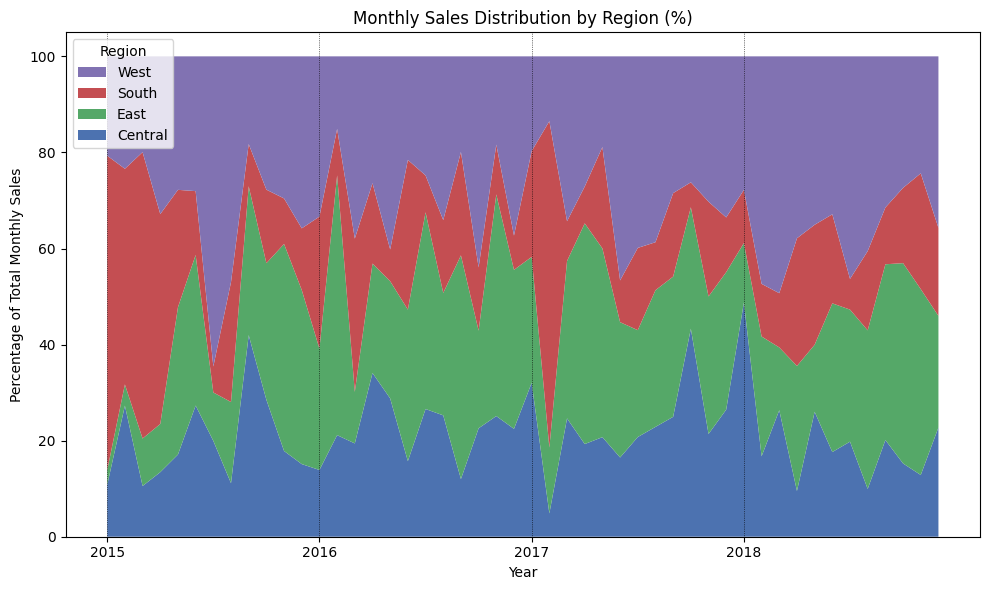

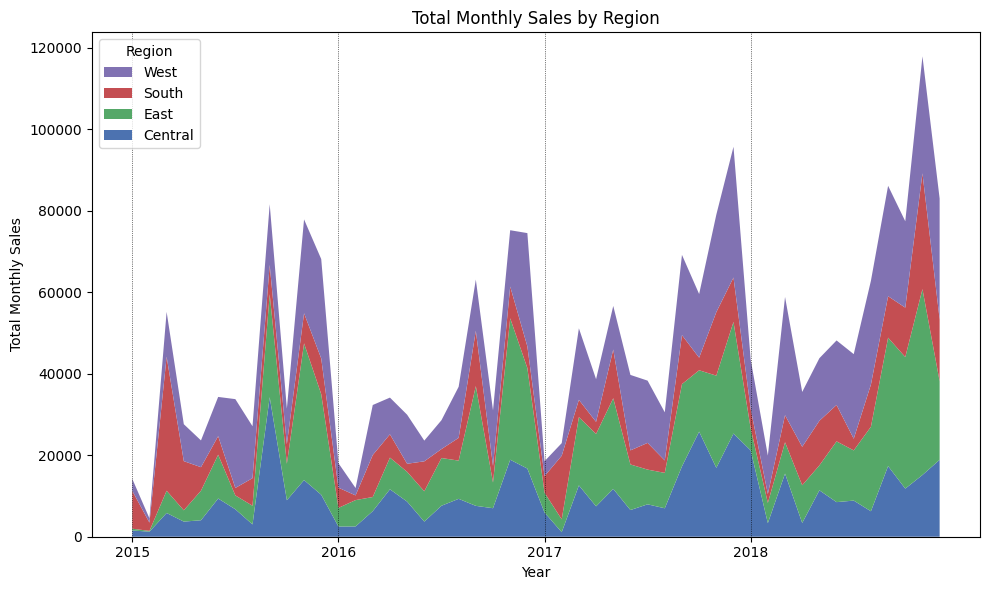

In [42]:
# Group by 'region' and 'month' to calculate monthly total sales
monthly_sales = df.groupby([df['order_date'].dt.to_period('M'), 'region'])['sales'].sum().unstack(fill_value=0)

# Normalize to get the percentage contribution of each region per month
monthly_sales_percent = monthly_sales.div(monthly_sales.sum(axis=1), axis=0) * 100

# Define a function to plot stacked area charts with yearly markers and yearly x-axis labels
def plot_stacked_area(data, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.stackplot(data.index.astype(str), data.T, labels=data.columns)

    # Add vertical lines at the start of each year
    years = sorted(data.index.year.unique())
    for year in years:
        plt.axvline(x=f'{year}-01', color='black', linestyle=':', linewidth=0.5)

    # Reverse legend order to match stacking
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1], loc='upper left', title='Region')

    # Set titles and labels
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(ylabel)

    # Show only years on the x-axis labels
    plt.xticks([f"{year}-01" for year in years], [str(year) for year in years])

    plt.tight_layout()
    plt.show()

# Plot the percentage stacked area chart
plt.style.use('seaborn-v0_8-deep')
plot_stacked_area(
    monthly_sales_percent,
    title='Monthly Sales Distribution by Region (%)',
    ylabel='Percentage of Total Monthly Sales'
)

# Plot the total sales stacked area chart
plot_stacked_area(
    monthly_sales,
    title='Total Monthly Sales by Region',
    ylabel='Total Monthly Sales'
)

### Top States by Sales
Here are the Top 10 states which generated the highest sales

In [43]:
state = df['state'].value_counts().reset_index()
state = state.rename(columns={'index':'count', 'count':'number_of_customer'})
state.head(10)

,state,number_of_customer
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504
5,Illinois,483
6,Ohio,453
7,Florida,373
8,Michigan,253
9,North Carolina,247


In [44]:
state_sales = df.groupby(['state'])['sales'].sum().reset_index()
top_states = state_sales.sort_values(by='sales', ascending=False)
top_states = top_states.rename(columns={'index':'sales', 'sales':'total_sales'})
top_states['total_sales'] = top_states['total_sales'].round(2)
top_10_states = top_states.head(10).reset_index(drop=True)
top_10_states

,state,total_sales
0,California,446306.46
1,New York,306361.15
2,Texas,168572.53
3,Washington,135206.85
4,Pennsylvania,116276.65
5,Florida,88436.53
6,Illinois,79236.52
7,Michigan,76136.07
8,Ohio,74848.98
9,Virginia,70636.72


In [45]:
fig=px.bar(
    top_10_states,
    x='state',
    y='total_sales',
    labels={'state': 'State Name ', 'total_sales': 'Total Sales '},
    color_discrete_sequence=px.colors.sequential.Agsunset
)

fig.update_layout(
    title={
        'text': "<b>Top 10 State by Sales<b>",
        'x': 0.5,
        'xanchor': 'center'},
    title_font=dict(size=20),
    yaxis=dict(showgrid=True, gridcolor='lightgrey', gridwidth=0.5),
    xaxis=dict(showgrid=False),
    font=dict(family="Poppins", size=12, color="black"),
    plot_bgcolor="rgba(0,0,0,0)",
    height=500
)

fig.update_traces(hovertemplate="<b>State:</b> %{x}<br><b>Total Sales:</b> $%{y:,.0f}")

fig.show()

### Top Cities by Sales
Here are the Top 10 cities which generated the highest sales

In [46]:
city = df['city'].value_counts().reset_index()
city = city.rename(columns={'index':'count', 'count':'number_of_customer'})
city.head(10)

,city,number_of_customer
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426
5,Houston,374
6,Chicago,308
7,Columbus,220
8,San Diego,170
9,Springfield,161


In [47]:
city_sales = df.groupby(['city'])['sales'].sum().reset_index()
top_cities = city_sales.sort_values(by='sales', ascending=False)
top_cities = top_cities.rename(columns={'index':'sales', 'sales':'total_sales'})
top_cities['total_sales'] = top_cities['total_sales'].round(2)
top_10_cities = top_cities.head(10).reset_index(drop=True)
top_10_cities

,city,total_sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


In [48]:
fig=px.bar(
    top_10_cities,
    x='city',
    y='total_sales',
    labels={'city': 'City Name ', 'total_sales': 'Total Sales '},
    color_discrete_sequence=px.colors.sequential.Agsunset
)

fig.update_layout(
    title={
        'text': "<b>Top 10 Cities by Sales<b>",
        'x': 0.15,
        'xanchor': 'center'},
    title_font=dict(size=20),
    yaxis=dict(showgrid=True, gridcolor='lightgrey', gridwidth=0.5),
    xaxis=dict(showgrid=False),
    font=dict(family="Poppins", size=12, color="black"),
    plot_bgcolor="rgba(0,0,0,0)",
    height=500
)

fig.update_traces(hovertemplate="<b>City:</b> %{x}<br><b>Total Sales:</b> $%{y:,.0f}")

fig.show()

### Top 10 Cities by Sales and Category
This section presents the top 10 cities with the highest sales, categorized by product type, offering insights into regional sales performance and market demand.

In [49]:
top_10_city_category = df.groupby(['city', 'category'])['sales'].sum().reset_index()

top_10_city_category = top_10_city_category.sort_values('sales', ascending=False).head(22)

top_10_city_category['sales'] = top_10_city_category['sales'].round(2)

fig = px.bar(
    top_10_city_category,
    x='city',
    y='sales',
    color='category',
    labels={'city': 'City', 'sales': 'Total Sales', 'category': 'Category'},
    title="<b>Top 10 Cities by Sales and Category</b>",
    color_discrete_sequence=px.colors.sequential.Agsunset,
    custom_data=['category']
)

fig.update_layout(
    barmode='group',
    title_font=dict(size=20),
    xaxis=dict(tickangle=-90),
    font=dict(family="Poppins", size=12, color="black"),
    height=500,
    plot_bgcolor="rgba(0,0,0,0)",
)

fig.update_traces(
    hovertemplate="<b>City:</b> %{x}<br>" +
                  "<b>Category:</b> %{customdata[0]}<br>" +
                  "<b>Total Sales:</b> $%{y:.0f}<extra></extra>"
)

fig.show()

### Top 10 Cities by Sales and Customer Segment
This analysis highlights the cities with the highest total sales, categorized by customer segments, providing insights into which urban areas contribute the most revenue across different market segments.

In [50]:
top_cities = df.groupby(["city", "segment"])["sales"].sum().reset_index()

top_cities = top_cities.sort_values("sales", ascending=False).head(17)

top_cities["sales"] = top_cities["sales"].round(2)

fig = px.bar(
    top_cities,
    x="city",
    y="sales",
    color="segment",
    labels={"city": "City", "sales": "Total Sales", "segment": "Segment"},
    title="<b>Top 10 Cities by Sales and Segment</b>",
    color_discrete_sequence=px.colors.sequential.Agsunset,
    custom_data=["segment"]
)

fig.update_layout(
    barmode="group",
    title_font=dict(size=20),
    xaxis=dict(tickangle=-90),
    font=dict(family="Poppins", size=12, color="black"),
    height=500,
    plot_bgcolor="rgba(0,0,0,0)",
)

fig.update_traces(
    hovertemplate="<b>City:</b> %{x}<br>" +
                  "<b>Segment:</b> %{customdata[0]}<br>" +
                  "<b>Total Sales:</b> $%{y:,.0f}<extra></extra>"
)

fig.show()


### Sales Distribution Across States

This section presents a geographic visualization of total sales across different U.S. states using a choropleth map. The color intensity represents the sales volume, allowing for quick identification of high and low-performing states.

In [51]:
# Data state dan state_code
state = ['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
         'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin', 'Wyoming']

state_code = ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
              'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
              'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# Membuat DataFrame untuk mapping state dan state_code
state_df = pd.DataFrame({'state': state, 'state_code': state_code})

# Pastikan df memiliki kolom 'state' dan 'sales'
# Hanya lakukan sum pada kolom numerik (contoh: sales)
sales = df.groupby("state")[["sales"]].sum().reset_index()

# Merge dengan state_df untuk mendapatkan state_code
sales = sales.merge(state_df, on="state", how="left")

# Sort berdasarkan sales
sales = sales.sort_values("sales", ascending=False).reset_index(drop=True)

# Plot Choropleth Map
sales['text'] = sales['state']
fig = go.Figure(data=go.Choropleth(
    locations=sales['state_code'],  # Kode negara bagian
    text=sales['text'],  # Nama state untuk label
    z=sales['sales'].astype(float),  # Data yang akan digunakan untuk pewarnaan
    locationmode='USA-states',
    colorscale='Reds',  # Skema warna
    colorbar_title="Sales",
))

fig.update_layout(
    title_text="Total Sales by State",
    geo_scope='usa',  # Fokus ke peta USA
)

fig.show()

## Conclusion
### Key Findings

**Sales Trends and Key Insights (2015–2018)**  

Between 2015 and 2018, the average revenue reached ``$231`` with a fluctuating trend throughout the months. A clear seasonal pattern is evident in the data, where sales tend to be lower at the beginning of the year and increase significantly toward the year's end.  

1. Annual Sales Trends and Seasonal Patterns  
Based on the data:  
- Q1 (January–March) consistently records the lowest sales period, with an average total revenue of ``$87,809`` per year. February is the weakest-performing month, with an average revenue of only ``$14,843`` per year.  
- Interestingly, March always sees a sales increase compared to January and February, indicating a demand recovery trend after the slow start of the year.  
- Q3 (July–September) shows a spike in September, which consistently records higher orders and revenue compared to previous months.  
- Q4 (October–December) is the peak sales period, with November experiencing the highest revenue surge, reaching an average of ``$87,540`` per year.  

This pattern suggests that March, September, and November are strategic months that businesses can leverage to boost sales.  

2. Transaction Value and Shifts in Purchasing Behavior  
- While the total orders in 2018 increased by 29% compared to the previous year, the average order value (AOV) slightly declined by 6%, with an average transaction value of ``$722,052``.  

3. Sales Distribution by Product Category  
The three main product categories contribute differently to total sales:  
- Office Supplies account for the highest number of orders, making up 60% of total orders, but have the lowest AOV of ``$119.38`` per order.  
- Technology generates the highest revenue, contributing 37% of total revenue, with the highest AOV of ``$456.40`` per order.  
- Furniture contributes 21% of total revenue, with an AOV of ``$350.69``.  

This indicates that while Technology and Furniture have high AOVs, Office Supplies remain essential for transaction volume.  

4. Customer Segments and Purchasing Patterns  
Customers fall into three main segments: Consumer, Corporate, and Home Office. Among total revenue, the Consumer segment contributes 51%, making it the largest in terms of transactions. However, in terms of AOV:  
- Home Office has the highest AOV at ``$243.38`` per order.  
- Corporate follows with an AOV of ``$233.15`` per order.  
- Consumer has the lowest AOV at ``$225.07`` per order.  

Interestingly, 7 out of the top 10 customers with the highest total purchases come from the Consumer segment, showing that despite a lower AOV, high transaction volume makes it a key segment.  

5. Geographic Distribution and Market Potential  
From a geographic perspective, California, New York, and Texas are the top three states in sales, contributing 41% of total revenue. The cities with the highest total revenue are:  
- New York City with revenue of ``$242,463``  
- Los Angeles with revenue of ``$173,420``  

6. Shipping Optimization and Customer Service  
To enhance customer experience and drive more transactions, shipping optimization is crucial. Corporate and Home Office customers have higher transaction values, making them more likely to appreciate premium services such as expedited shipping.

### Recommendations

**Sales Strategy and Optimization Recommendations**  

1. **Seasonal Strategy Optimization**  
   - Maximize marketing campaigns in March, September, and November.  
   - Offer early-year promotions/discounts (January–February) to boost demand.  
   - Optimize stock levels ahead of Q4 (October–December) to meet the demand surge in November.  

2. **Increasing Average Order Value (AOV)**  
   - Implement product bundling strategies for the Office Supplies category.  
   - Provide cashback or volume-based discounts.  
   - Optimize customer loyalty programs, especially for the Consumer segment.  

3. **Sales Optimization by Product Category**  
   - Focus marketing efforts on the Technology category due to its highest revenue contribution.  
   - Offer progressive discounts on Furniture to attract more buyers.  
   - Apply upselling & cross-selling strategies for the Office Supplies category.  

4. **Customer Segment-Based Strategy**  
   - Provide premium services for Corporate & Home Office customers.  
   - Increase engagement with the Consumer segment through referral programs.  
   - Utilize data-driven marketing strategies for personalized offers.  

5. **Geographic Expansion and Focus**  
   - Strengthen stock availability & distribution in California, New York, and Texas.  
   - Maximize location-based marketing campaigns in New York City & Los Angeles.  
   - Conduct research on expansion opportunities in high-growth potential areas.  

6. **Logistics and Delivery Efficiency Improvement**  
   - Offer fast shipping options for Corporate & Home Office customers.  
   - Evaluate logistics partner performance and enhance supply chain efficiency.